In [ ]:
#!pip install tensorflow==2.0.0a0
import pandas as pd
#import keras
import tensorflow.keras as keras 
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
import tensorflow as tf
import sklearn
print(tf.__version__)
from  tensorflow.keras.models import load_model
model = load_model('/content/ibm3_best.h5')
import joblib
model = load_model("/content/ibm3_best.h5")
filename = 'finalized_model.sav'
joblib.dump(model, open(filename, 'wb'))

In [ ]:
data = pd.read_csv("T1.csv")
data.columns

Index(['Date/Time', 'LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)'],
      dtype='object')

In [ ]:
data = data.drop('Date/Time',axis= 1)
data = data.drop('Theoretical_Power_Curve (KWh)',axis= 1)

In [ ]:
data.columns

Index(['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Wind Direction (°)'], dtype='object')

In [ ]:
train_dataset = data.sample(frac=0.8,random_state=0)
test_dataset = data.drop(train_dataset.index)

In [ ]:
train_stats = train_dataset.describe()
train_stats.pop("LV ActivePower (kW)")
train_stats = train_stats.transpose()
print(train_stats)

train_labels = train_dataset.pop('LV ActivePower (kW)')
test_labels = test_dataset.pop('LV ActivePower (kW)')



                      count        mean  ...         75%         max
Wind Speed (m/s)    40424.0    7.549162  ...   10.293573   25.206011
Wind Direction (°)  40424.0  123.516124  ...  201.474422  359.997589

[2 rows x 8 columns]


In [ ]:
print(train_labels)


47469     576.656982
4456     1619.301025
49305    1876.581055
48151    3367.349121
33422     151.391693
            ...     
22623    3602.947998
11095     977.577087
10092    2012.953003
26364    1071.803955
1350        0.000000
Name: LV ActivePower (kW), Length: 40424, dtype: float64


In [ ]:
print(test_labels)

10        498.181702
11        526.816223
13        655.194275
19        787.246216
21        935.033386
            ...     
50506    1731.552979
50509    1433.415039
50520    2771.110107
50524    3514.269043
50527    2201.106934
Name: LV ActivePower (kW), Length: 10106, dtype: float64


In [ ]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [ ]:
print(normed_test_data)

       Wind Speed (m/s)  Wind Direction (°)
10            -0.431739            1.373513
11            -0.382041            1.519643
13            -0.319222            1.532791
19            -0.262971            1.434617
21            -0.154035            1.353841
...                 ...                 ...
50506          0.266219           -0.485323
50509         -0.013113           -0.452043
50520          0.616339           -0.440742
50524          1.185184           -0.460434
50527          0.209642           -0.414978

[10106 rows x 2 columns]


In [ ]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    Dropout(0.25),
    #layers.Dense(128, activation='relu'),
    #layers.Dense(256, activation='relu'),
    
    layers.Dense(1,activation = "linear")
  ])

    optimizer = keras.optimizers.RMSprop(0.0001)

    model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])
    return model

model = build_model()

model.summary()

example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 150

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)
#
print("Testing set Mean Abs Error: {:5.2f} ".format(mae))

test_predictions = model.predict(normed_test_data).flatten()

Testing set Mean Abs Error: 154.35 


In [ ]:
test_predictions

array([ 436.4248 ,  496.5943 ,  578.92017, ..., 2361.6362 , 3425.8855 ,
       1517.4164 ], dtype=float32)

In [ ]:
test_labels

10        498.181702
11        526.816223
13        655.194275
19        787.246216
21        935.033386
            ...     
50506    1731.552979
50509    1433.415039
50520    2771.110107
50524    3514.269043
50527    2201.106934
Name: LV ActivePower (kW), Length: 10106, dtype: float64

In [ ]:
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))

TypeError: ignored

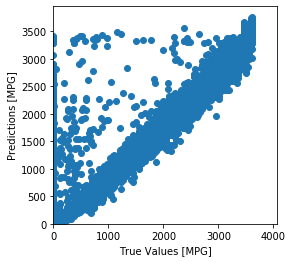

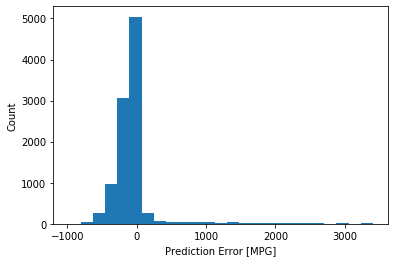

In [ ]:
import matplotlib.pyplot as plt 
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100, 100], [-100, 100])
plt.show()
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
plt.ylabel("Count")
plt.show()

In [ ]:
model.save('ibm3_best.h5')

In [ ]:
from keras.models import load_model
load = load_model("ibm3_best.h5")

In [ ]:
#linear regression model 
from sklearn import linear_model
import numpy as np
lr =  linear_model.LinearRegression()
#train_x = np.asanyarray(train[['ENGINESIZE']])
#train_y = np.asanyarray(train[['CO2EMISSIONS']])
lr.fit (normed_train_data, train_labels)
# The coefficients
print ('Coefficients: ', lr.coef_)
print ('Intercept: ',lr.intercept_)

test_y_ = lr.predict(normed_test_data)

#print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - normed_test_data)))
#print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - normed_test_data) ** 2))
#print("R2-score: %.2f" % r2_score(test_y_ , normed_test_data) )
print(test_y_)
print(test_labels)

Coefficients:  [1196.25215527   10.69455028]
Intercept:  1303.8065071247936
[ 802.02666992  863.04074476  938.32844386 ... 2036.39020609 2716.66184061
 1550.1526064 ]
10        498.181702
11        526.816223
13        655.194275
19        787.246216
21        935.033386
            ...     
50506    1731.552979
50509    1433.415039
50520    2771.110107
50524    3514.269043
50527    2201.106934
Name: LV ActivePower (kW), Length: 10106, dtype: float64
